1 Dane pochodzą z systemu Kaagle: https://www.kaggle.com/datasets/anassarfraz13/toyota-used-car-market-insights

1.1 Zbiór danych zawiera informacje dotyczące samochodów marki Toyota

1.2 Kolumny w zbiorze danych

- model: Nazwa modelu auta

- year: Rok produkcji

- price: Cena auta

- transmission: Rodzaj skrzyni biegów

- mileage: Przebieg samochodu

- fuelType: Typ paliwa

- tax: Wysokość podatku drogowego

- mpg: Zużycie paliwa

- engineSize: Pojemność silnika

1.3 Celem projektu jest analiza danych samochoddów marki Toyota
oraz możliwość porównania między innymi poszczególnych modeli.

In [14]:
#Wczytanie danych i bibliotek
options(warn = -1)
library(tidyverse)
library(ggplot2)
library(dplyr)
df <- read.csv("toyota.csv")


glimpse(df)
summary(df)

Rows: 6,738
Columns: 9
$ model        <chr> " GT86", " GT86", " GT86", " GT86", " GT86", " GT86", " G…
$ year         <int> 2016, 2017, 2015, 2017, 2017, 2017, 2017, 2017, 2020, 201…
$ price        <int> 16000, 15995, 13998, 18998, 17498, 15998, 18522, 18995, 2…
$ transmission <chr> "Manual", "Manual", "Manual", "Manual", "Manual", "Manual…
$ mileage      <int> 24089, 18615, 27469, 14736, 36284, 26919, 10456, 12340, 5…
$ fuelType     <chr> "Petrol", "Petrol", "Petrol", "Petrol", "Petrol", "Petrol…
$ tax          <int> 265, 145, 265, 150, 145, 260, 145, 145, 150, 265, 265, 14…
$ mpg          <dbl> 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2, 33.2, 36.…
$ engineSize   <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, …


    model                year          price       transmission      
 Length:6738        Min.   :1998   Min.   :  850   Length:6738       
 Class :character   1st Qu.:2016   1st Qu.: 8290   Class :character  
 Mode  :character   Median :2017   Median :10795   Mode  :character  
                    Mean   :2017   Mean   :12522                     
                    3rd Qu.:2018   3rd Qu.:14995                     
                    Max.   :2020   Max.   :59995                     
    mileage         fuelType              tax             mpg        
 Min.   :     2   Length:6738        Min.   :  0.0   Min.   :  2.80  
 1st Qu.:  9446   Class :character   1st Qu.:  0.0   1st Qu.: 55.40  
 Median : 18513   Mode  :character   Median :135.0   Median : 62.80  
 Mean   : 22857                      Mean   : 94.7   Mean   : 63.04  
 3rd Qu.: 31064                      3rd Qu.:145.0   3rd Qu.: 69.00  
 Max.   :174419                      Max.   :565.0   Max.   :235.00  
   engineSize   
 Mi

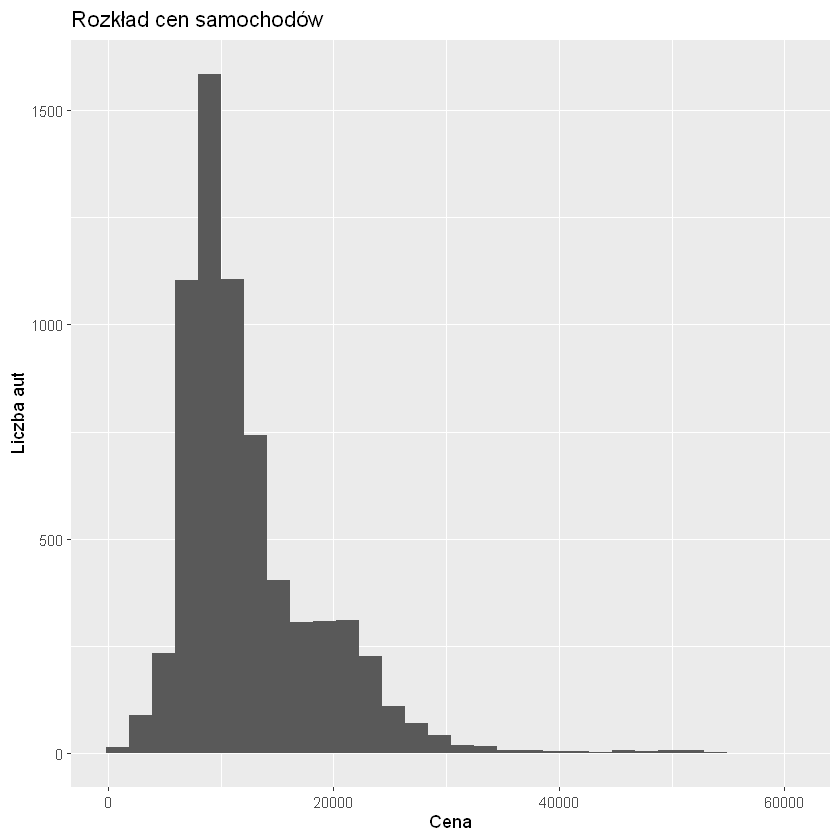

In [6]:
ggplot(df, aes(price)) +
  geom_histogram(bins = 30) +
  labs(title="Rozkład cen samochodów", x="Cena", y="Liczba aut")


Można zauważyć, że większość aut mieści się w jednym przedziale cenowym, co sugeruje spójny rynek wtórny.

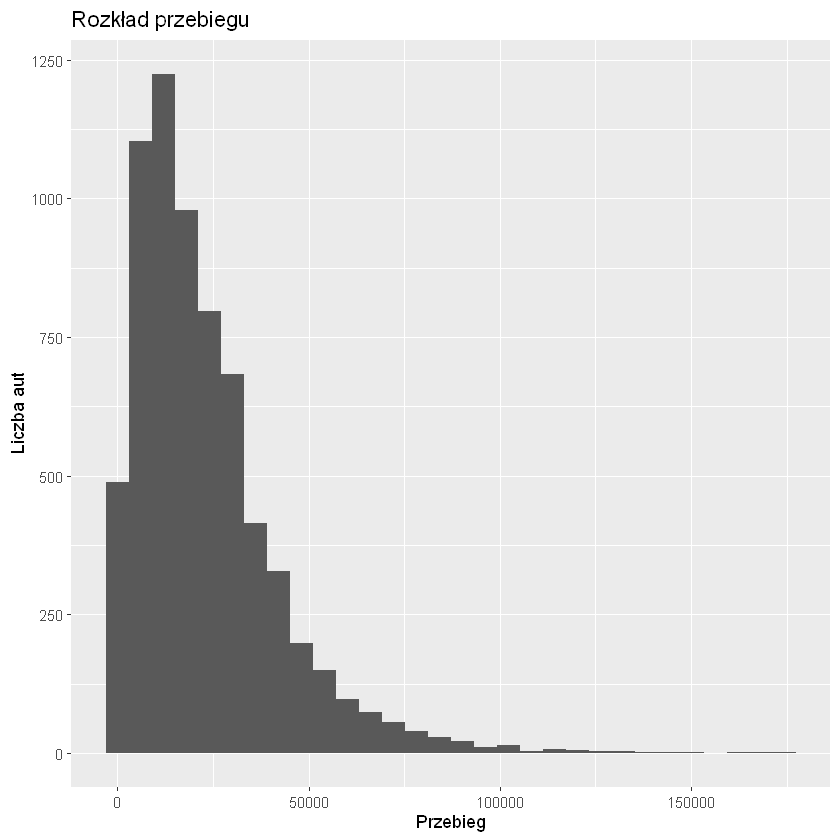

In [5]:
ggplot(df, aes(mileage)) +
  geom_histogram(bins = 30) +
  labs(title="Rozkład przebiegu", x="Przebieg", y="Liczba aut")

Większość aut ma umiarkowany przebieg, a mała liczba ma ekstremalnie wysoki.

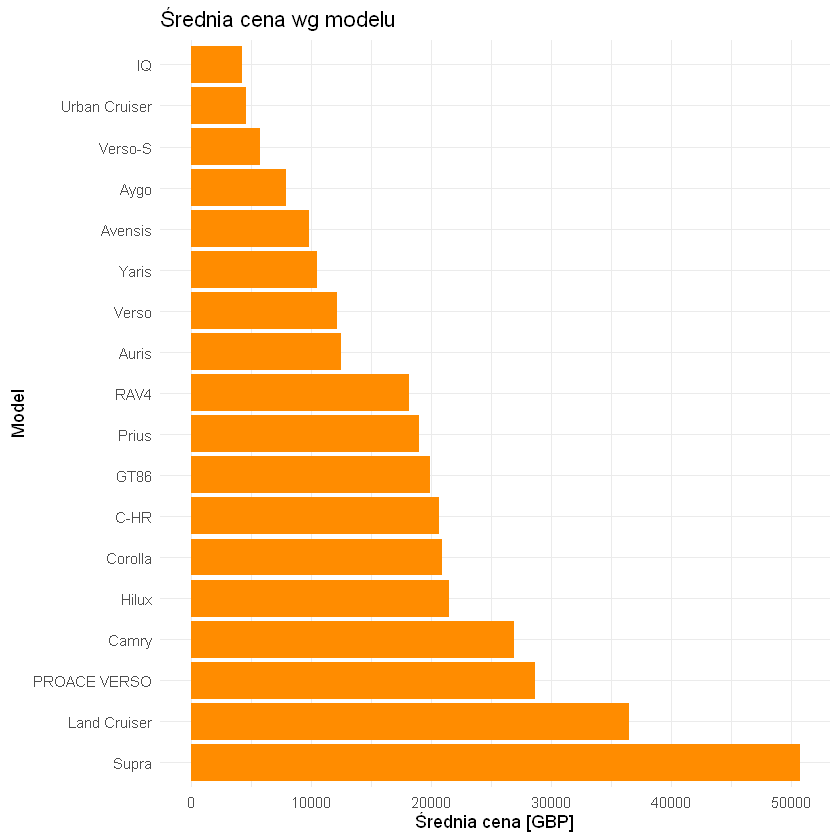

In [6]:
df %>%
  group_by(model) %>%
  summarise(mean_price = mean(price, na.rm = TRUE)) %>%
  ggplot(aes(x = reorder(model, -mean_price), y = mean_price)) +
  geom_col(fill = "darkorange") +
  coord_flip() +
  labs(
    title = "Średnia cena wg modelu",
    x = "Model",
    y = "Średnia cena [GBP]"
  ) +
  theme_minimal()

Modele flagowe lub nowsze mają wyższe mediany i większą stabilność cen (mniejszy rozrzut).

Modele sportowe lub hybrydowe zwykle wyróżniają się cenowo.

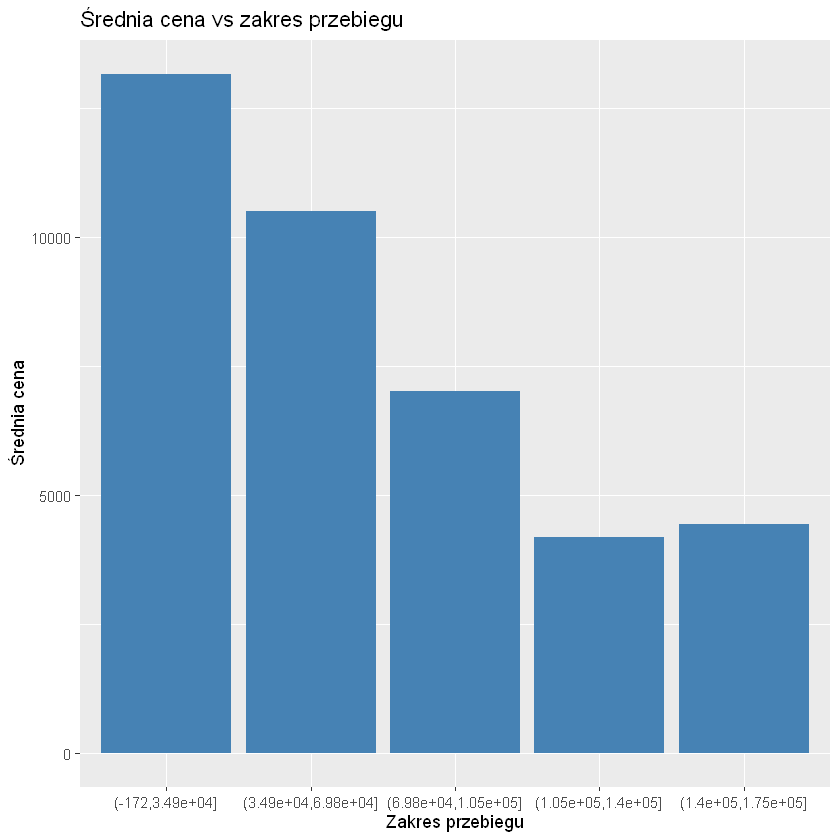

In [9]:
library(dplyr)
library(ggplot2)

df %>%
  mutate(mileage_bin = cut(mileage, breaks = 5)) %>% 
  group_by(mileage_bin) %>%
  summarise(mean_price = mean(price)) %>%
  ggplot(aes(x = mileage_bin, y = mean_price)) +
  geom_col(fill = "steelblue") +
  labs(title = "Średnia cena vs zakres przebiegu",
       x = "Zakres przebiegu",
       y = "Średnia cena")


Na wykresie można zauważyć, że im większy przebieg, tym niższa cena.

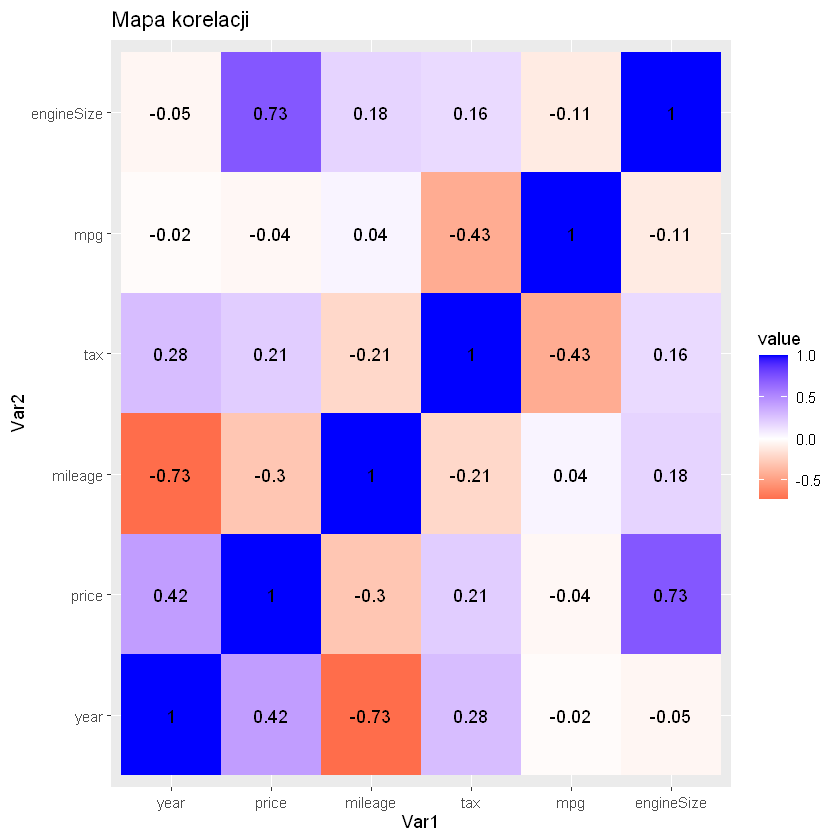

In [12]:
library(reshape2)

corr <- cor(num_df, use="complete.obs")
melted <- melt(corr)

ggplot(melted, aes(Var1, Var2, fill=value)) +
  geom_tile() +
  geom_text(aes(label=round(value, 2))) +
  labs(title="Mapa korelacji") +
  scale_fill_gradient2(low="red", high="blue", mid="white", midpoint=0)

Można zauważyć, że nowsze auta są stosunkowo droższe do starszych a jest to spowodowane przebiegiem.

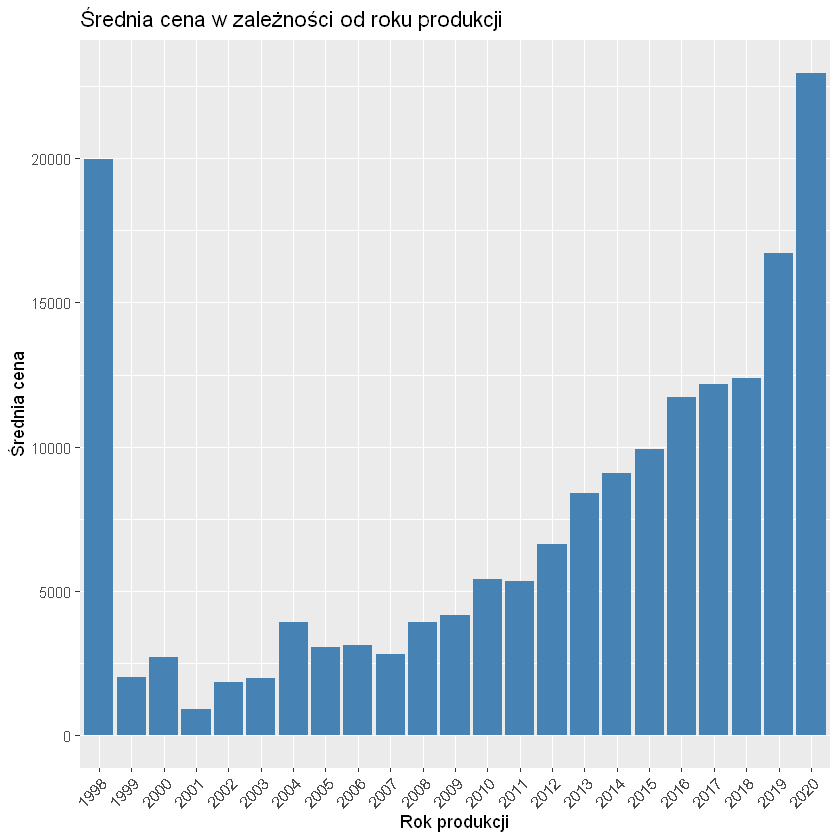

In [10]:
library(dplyr)
library(ggplot2)

df %>%
  group_by(year) %>%
  summarise(mean_price = mean(price)) %>%
  ggplot(aes(x = factor(year), y = mean_price)) +
  geom_col(fill = "steelblue") +
  labs(
    title = "Średnia cena w zależności od roku produkcji",
    x = "Rok produkcji",
    y = "Średnia cena"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


Nowsze roczniki mają wyższe ceny, linia regresji zwykle rośnie.

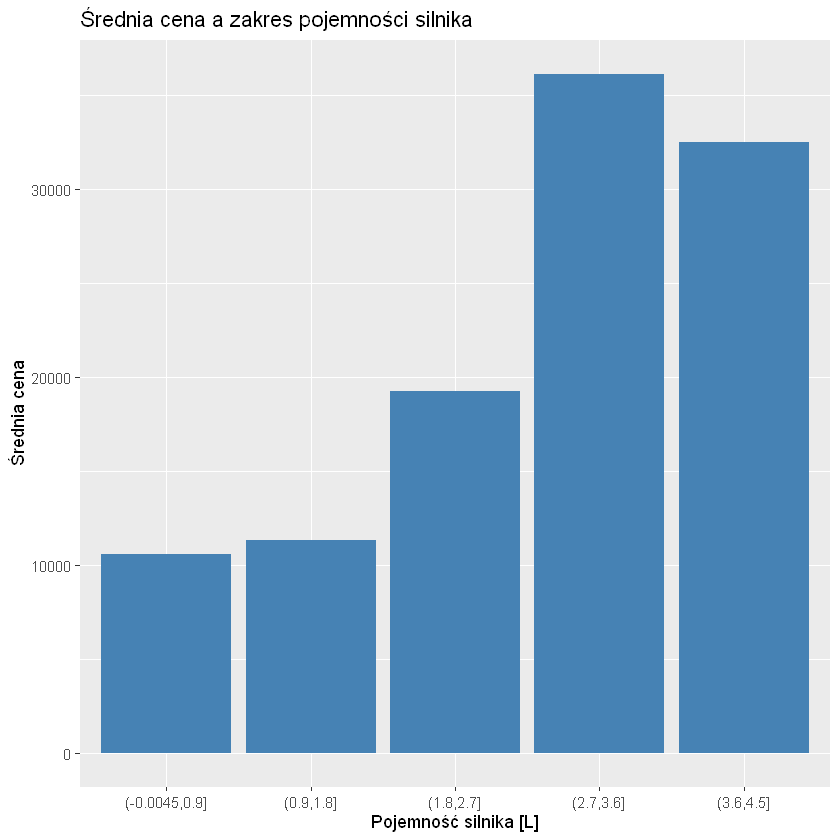

In [11]:
df %>%
  mutate(engine_bin = cut(engineSize, breaks = 5)) %>% 
  group_by(engine_bin) %>%
  summarise(mean_price = mean(price)) %>%
  ggplot(aes(x = engine_bin, y = mean_price)) +
  geom_col(fill = "steelblue") +
  labs(
    title = "Średnia cena a zakres pojemności silnika",
    x = "Pojemność silnika [L]",
    y = "Średnia cena"
  )


Na wykresie można zauważyć, że zazwyczaj większe pojemności silnika są droższe.

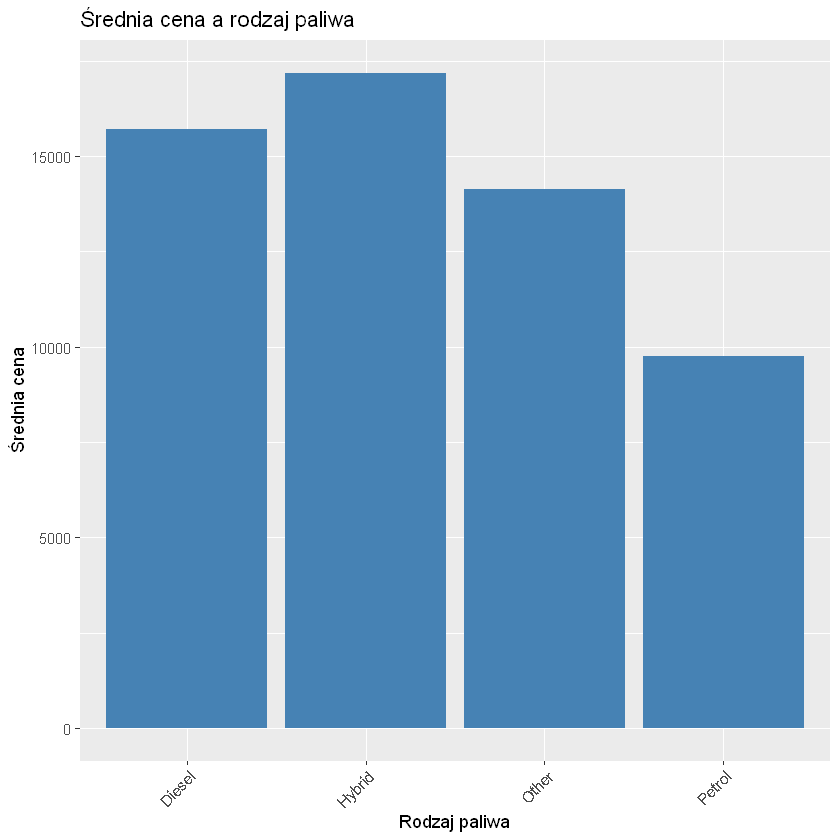

In [12]:
df %>%
  group_by(fuelType) %>%
  summarise(mean_price = mean(price)) %>%
  ggplot(aes(x = fuelType, y = mean_price)) +
  geom_col(fill = "steelblue") +
  labs(
    title = "Średnia cena a rodzaj paliwa",
    x = "Rodzaj paliwa",
    y = "Średnia cena"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Boxplot paliw pozwala zobaczyć różnice między hybrydami, benzyną, dieslem, hybrydy często trzymają wyższą cenę

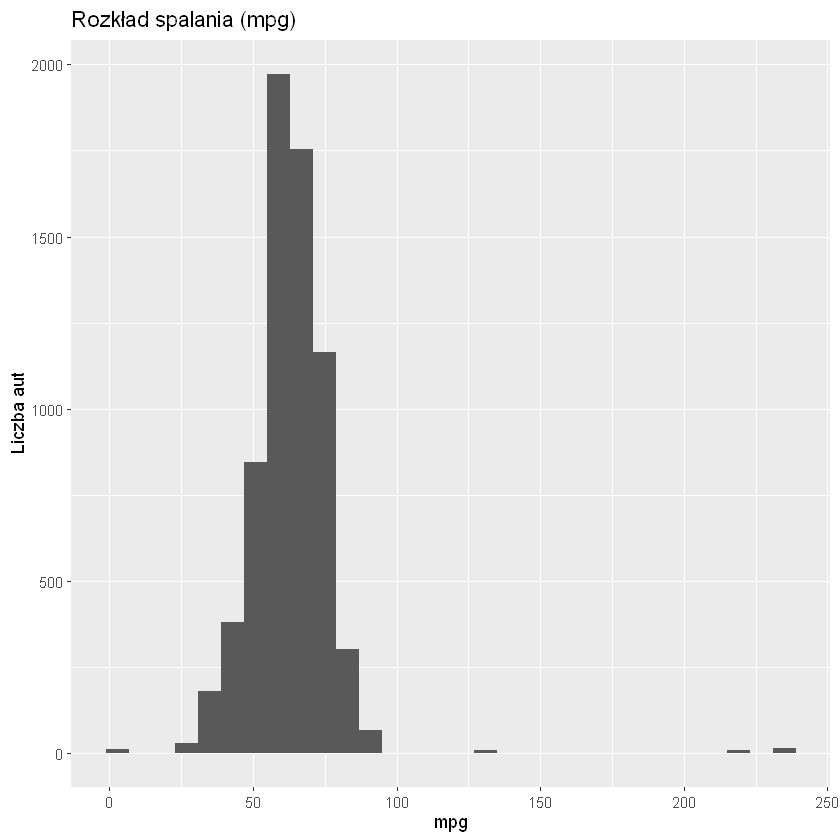

In [17]:
ggplot(df, aes(mpg)) +
  geom_histogram(bins = 30) +
  labs(title="Rozkład spalania (mpg)", x="mpg", y="Liczba aut")

Jeśli rozkład jest skupiony — oferta dotyczy podobnych silników.
Jeśli rozciągnięty — w datasetcie są auta od oszczędnych po bardzo paliwożerne.

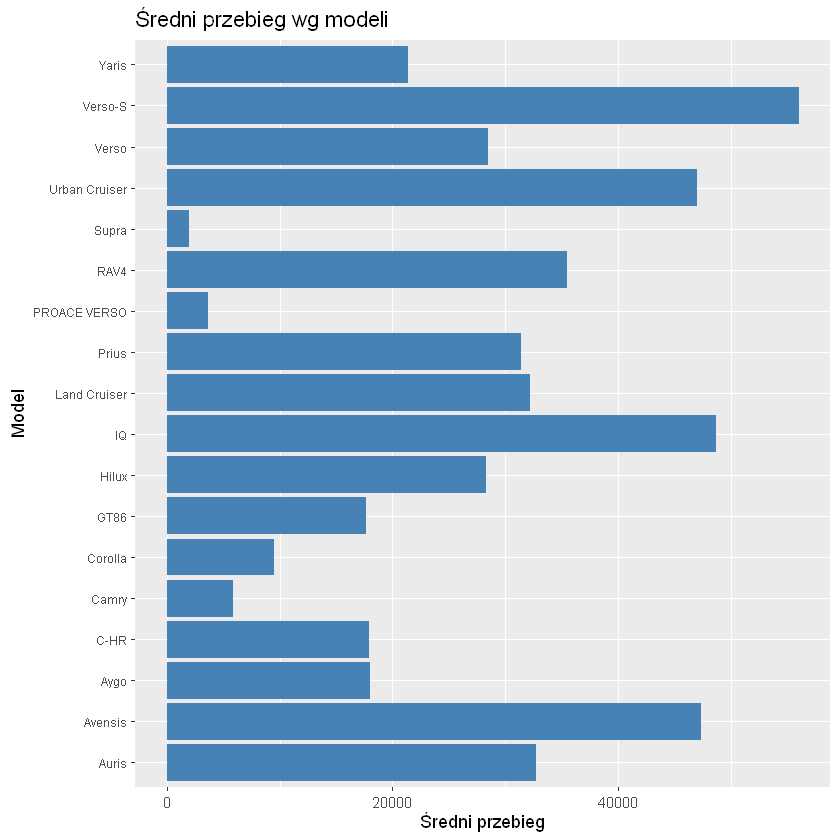

In [14]:
df %>%
  group_by(model) %>%
  summarise(mean_mileage = mean(mileage)) %>%
  ggplot(aes(x = model, y = mean_mileage)) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  labs(
    title = "Średni przebieg wg modeli",
    x = "Model",
    y = "Średni przebieg"
  ) +
  theme(axis.text.y = element_text(size = 7))


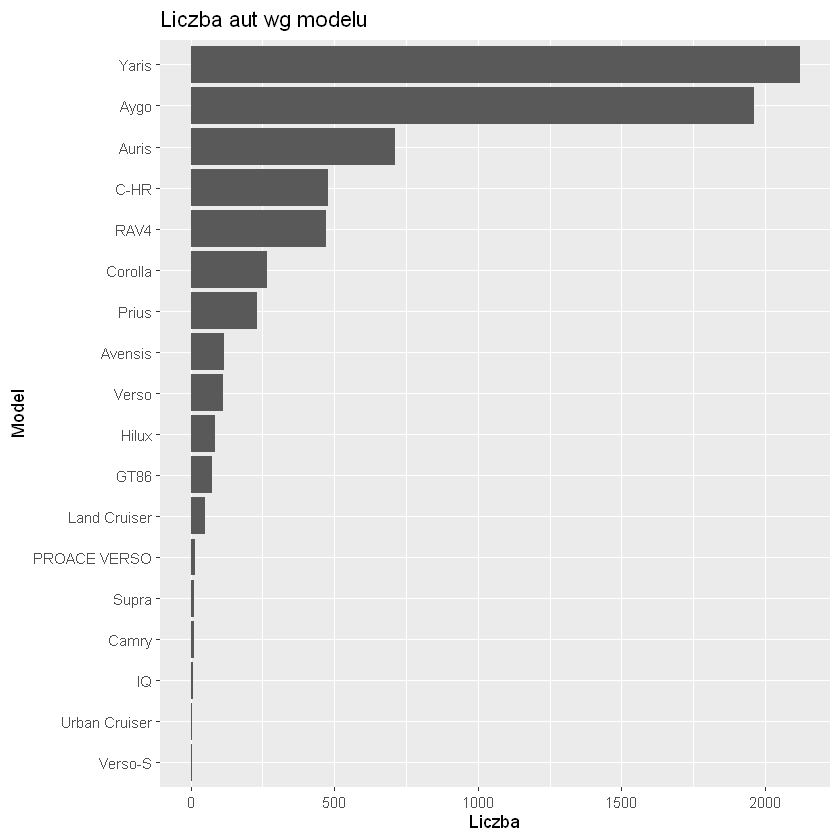

In [39]:
df %>%
  count(model) %>%
  ggplot(aes(reorder(model, n), n)) +
  geom_col() +
  coord_flip() +
  labs(title="Liczba aut wg modelu", x="Model", y="Liczba")

Modele z dużą liczbą ofert mają bardziej stabilną cenę (duża podaż).

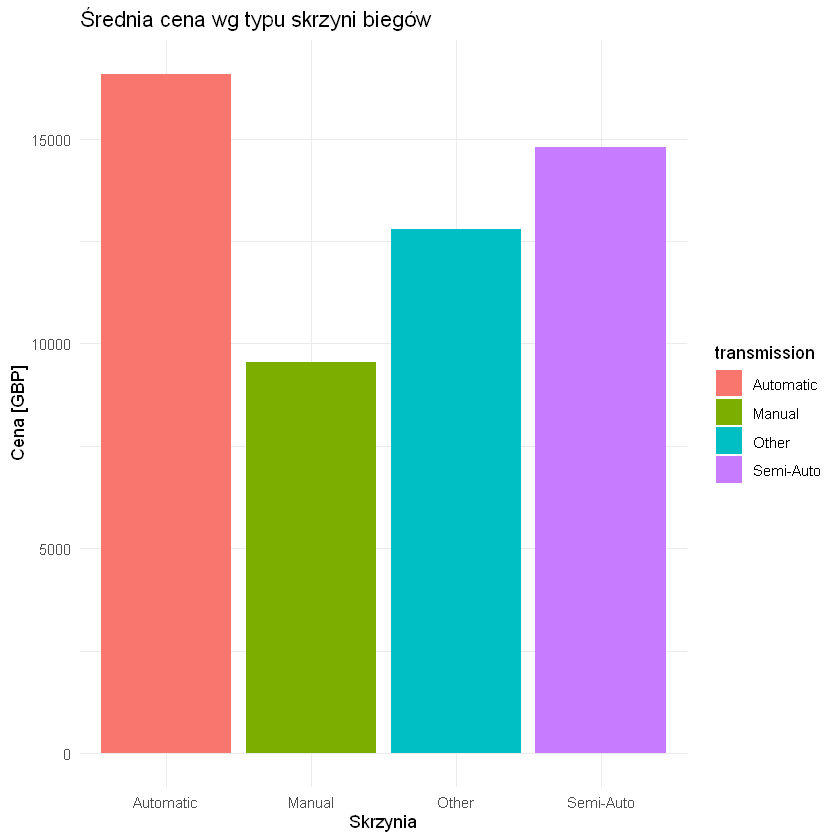

In [5]:
df %>%
  group_by(transmission) %>%
  summarise(mean_price = mean(price)) %>%
  ggplot(aes(transmission, mean_price, fill = transmission)) +
  geom_col() +
  labs(
    title = "Średnia cena wg typu skrzyni biegów",
    x = "Skrzynia",
    y = "Cena [GBP]"
  ) +
  theme_minimal()

Zwykle automaty mają wyższą medianę ceny — szczególnie w nowszych modelach

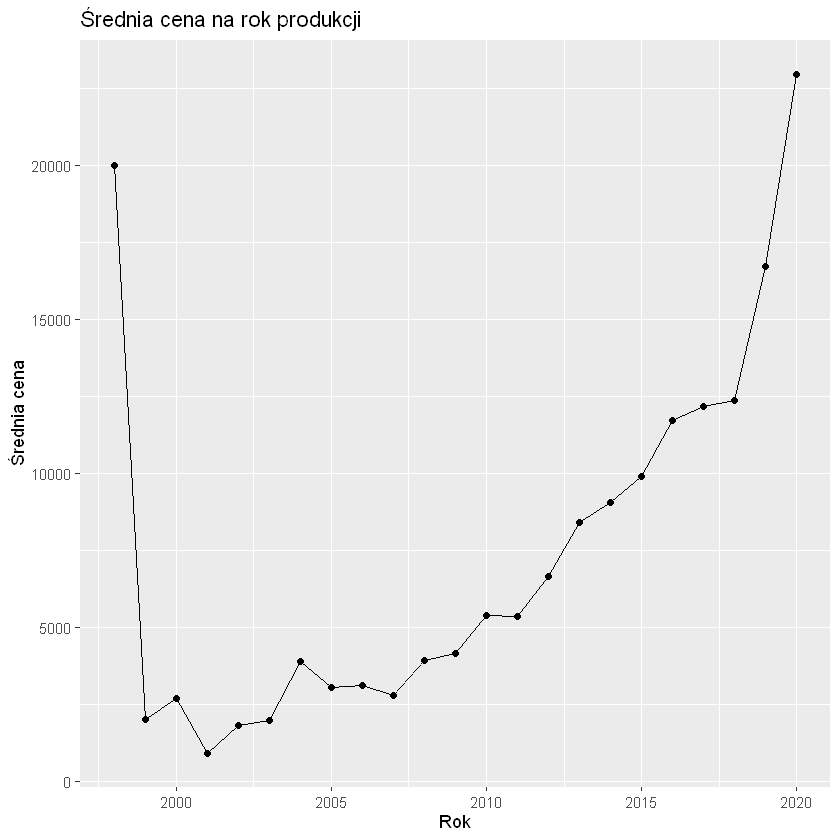

In [22]:
df %>%
  group_by(year) %>%
  summarise(mean_price = mean(price)) %>%
  ggplot(aes(year, mean_price)) +
  geom_line() +
  geom_point() +
  labs(title="Średnia cena na rok produkcji", x="Rok", y="Średnia cena")

Dobry wykres do wyłapania nagłych skoków lub spadków wartości roczników.

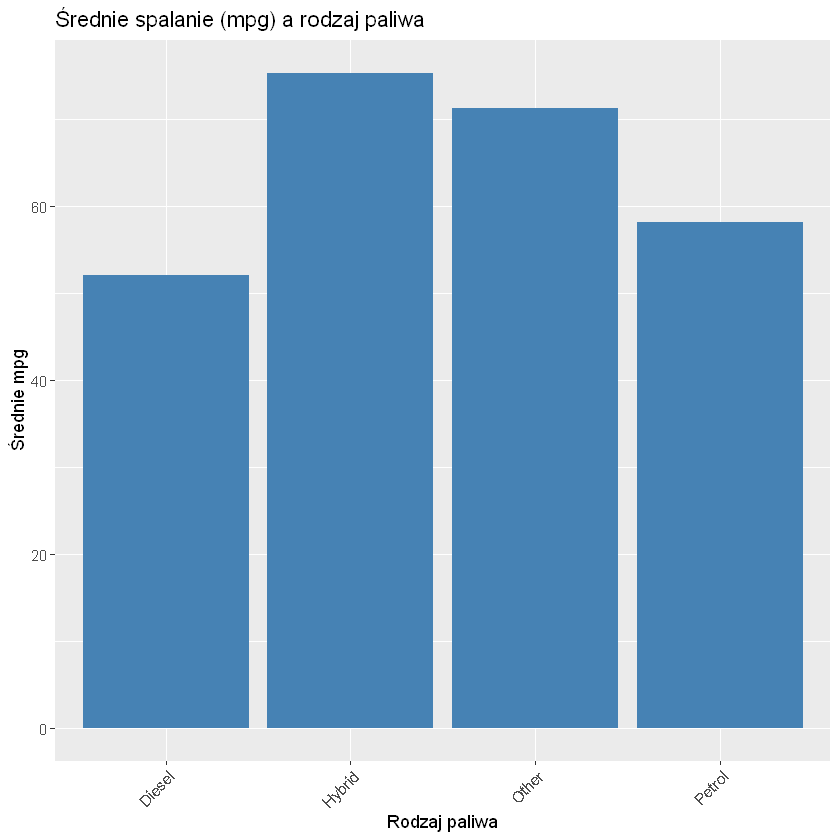

In [15]:
library(dplyr)
library(ggplot2)

df %>%
  group_by(fuelType) %>%
  summarise(mean_mpg = mean(mpg)) %>%
  ggplot(aes(x = fuelType, y = mean_mpg)) +
  geom_col(fill = "steelblue") +
  labs(
    title = "Średnie spalanie (mpg) a rodzaj paliwa",
    x = "Rodzaj paliwa",
    y = "Średnie mpg"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


Hybrydy mają zwykle najlepsze mpg, diesle również wyższe niż benzyna.

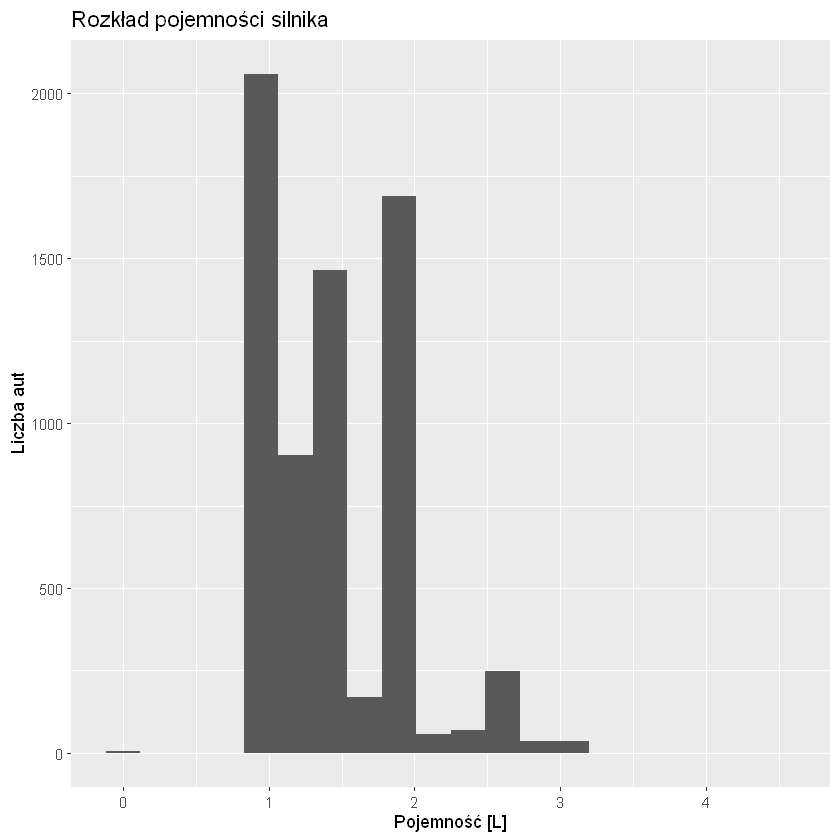

In [29]:
ggplot(df, aes(engineSize)) +
  geom_histogram(bins = 20) +
  labs(title="Rozkład pojemności silnika", x="Pojemność [L]", y="Liczba aut")

Jeśli większość to małe silniki, to dataset dotyczy głównie modeli miejskich.

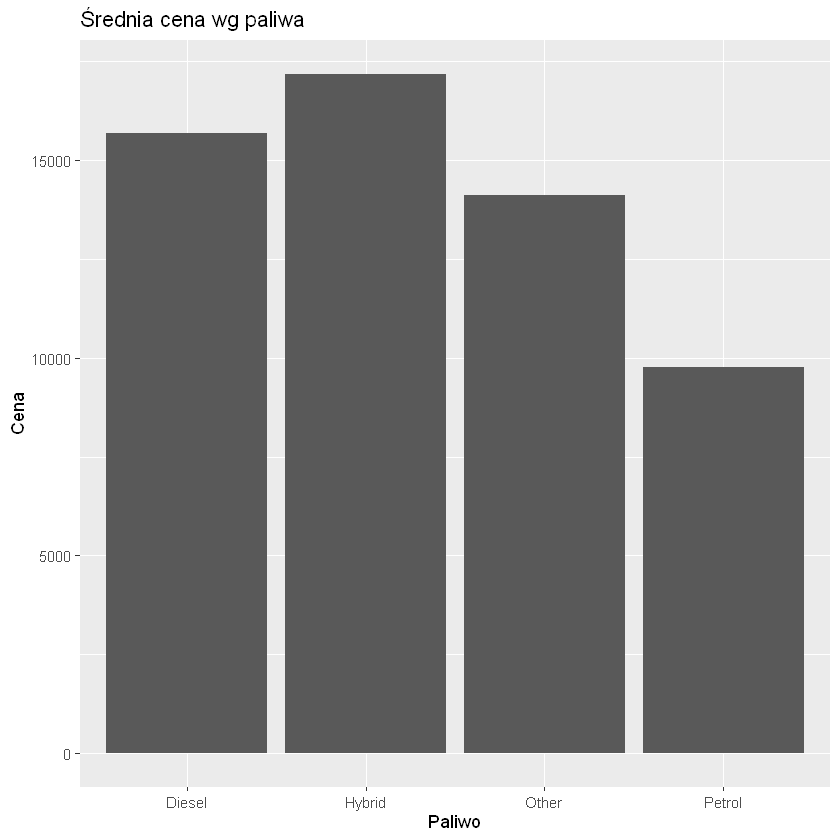

In [30]:
df %>%
  group_by(fuelType) %>%
  summarise(mean_price = mean(price), n=n()) %>%
  ggplot(aes(fuelType, mean_price)) +
  geom_col() +
  labs(title="Średnia cena wg paliwa", x="Paliwo", y="Cena")

Hybrydy zwykle mają najwyższą średnią, diesel niższą.

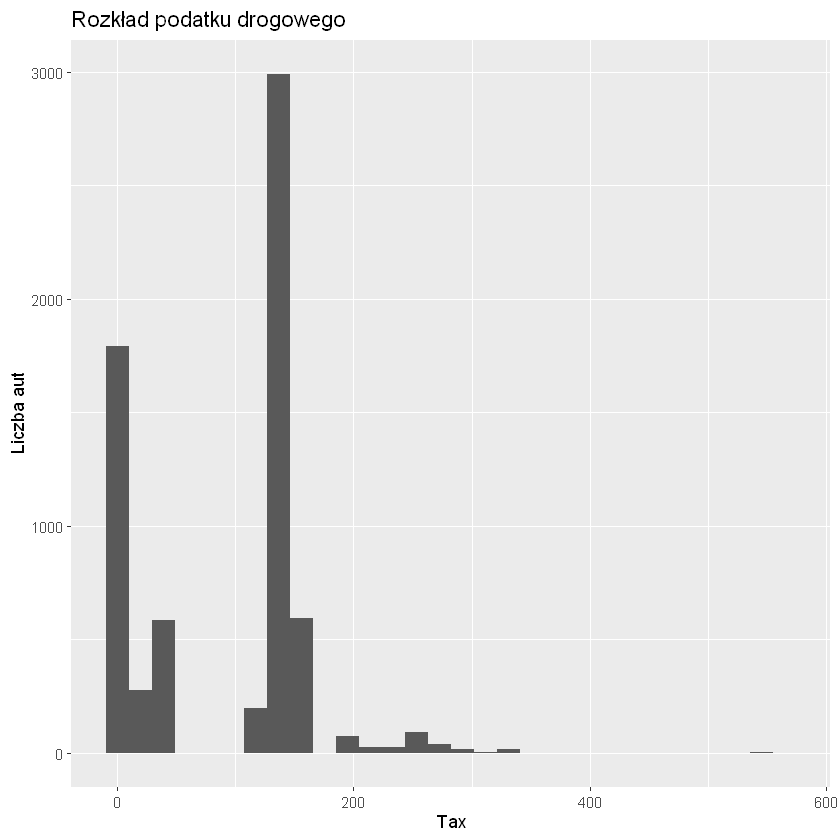

In [31]:
ggplot(df, aes(tax)) +
  geom_histogram(bins = 30) +
  labs(title="Rozkład podatku drogowego", x="Tax", y="Liczba aut")

Jeśli podatki są niskie – modele są bardziej ekologiczne lub mniej pojemne.

`geom_smooth()` using formula = 'y ~ x'


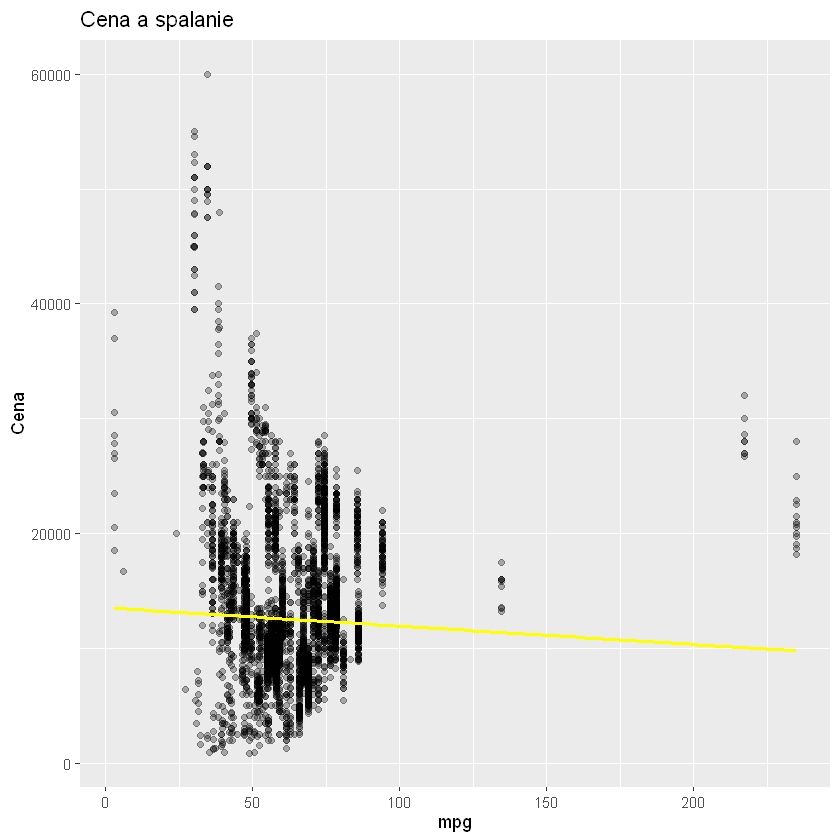

In [13]:
ggplot(df, aes(mpg, price)) + geom_point(alpha=0.3) + geom_smooth(method="lm", se=FALSE, color="yellow") + labs(title="Cena a spalanie", x="mpg", y="Cena")

Lekko dodatni trend jest typowy — oszczędne auta trzymają cenę.

`geom_smooth()` using formula = 'y ~ x'


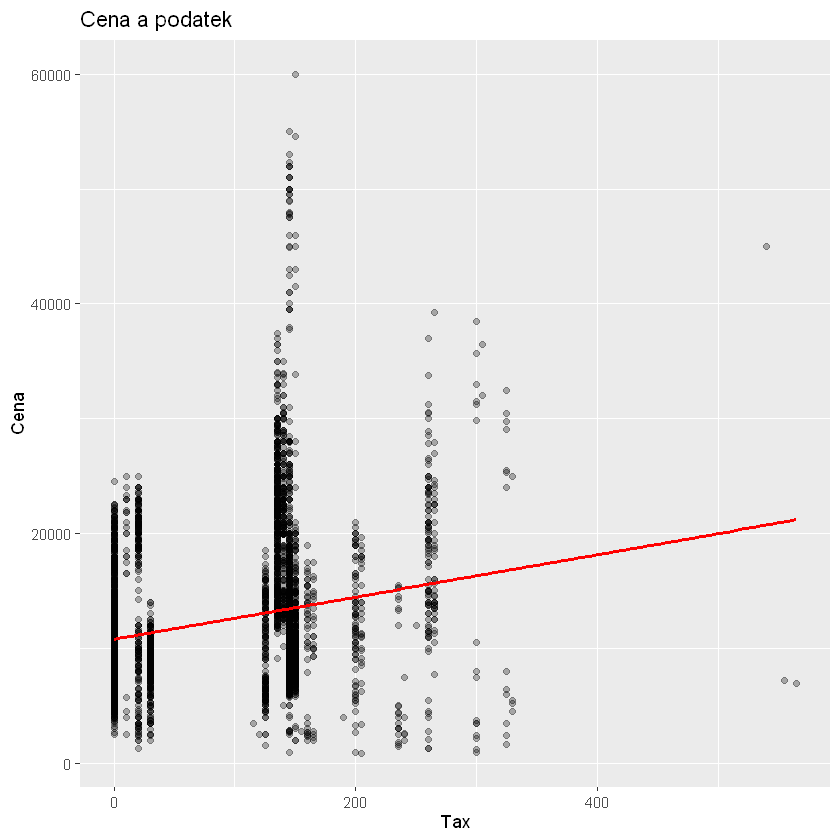

In [11]:
ggplot(df, aes(tax, price)) + geom_point(alpha=0.3) + geom_smooth(method="lm", se=FALSE, color="red") + labs(title="Cena a podatek", x="Tax", y="Cena")

Wyższe podatki oznaczają zwykle większe silniki — i często wyższe ceny.

`geom_smooth()` using formula = 'y ~ x'


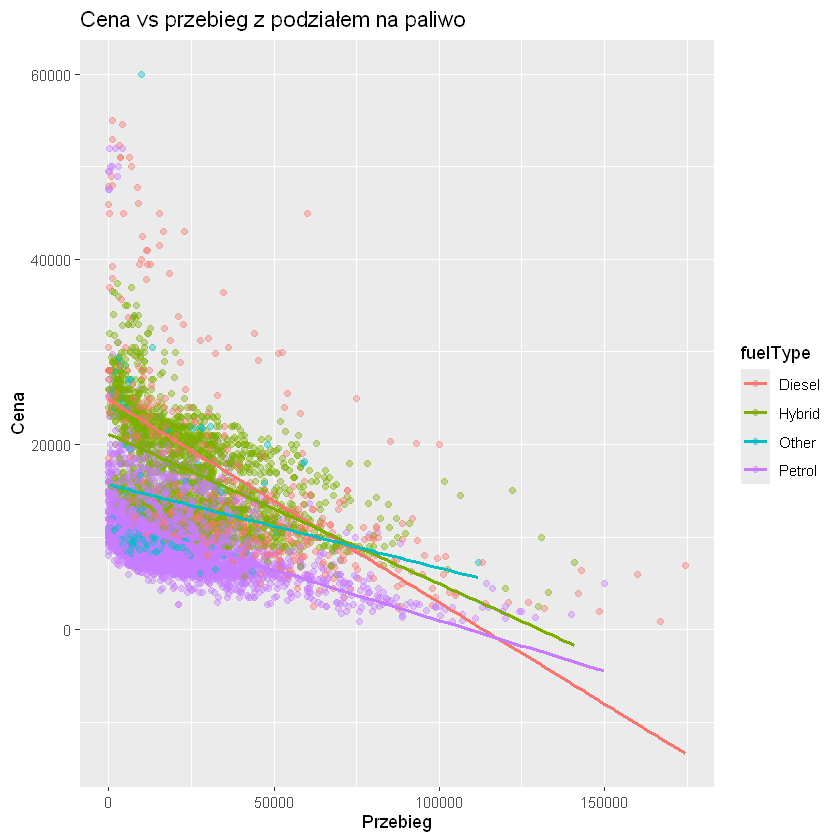

In [45]:
ggplot(df, aes(mileage, price, color=fuelType)) +
  geom_point(alpha=0.4) +
  geom_smooth(method="lm", se=FALSE) +
  labs(title="Cena vs przebieg z podziałem na paliwo", 
       x="Przebieg", y="Cena")

Hybrydy trzymają cenę nawet przy wyższym przebiegu oraz benzyna spada najszybciej wraz z przebiegiem.